In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import Imputer

from sklearn.preprocessing import Normalizer

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt   
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns

In [2]:
df = pd.read_csv('Automobile_data.csv')

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Exploratory Data Analysis

# a. Analyse Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
# convert '?' to None
df = df.replace('?', np.nan)

In [7]:
na_cols = {}
for col in df.columns:
    missed = df.shape[0] - df[col].dropna().shape[0]
    if missed > 0:
        na_cols[col] = missed
na_cols

{'bore': 4,
 'horsepower': 2,
 'normalized-losses': 41,
 'num-of-doors': 2,
 'peak-rpm': 2,
 'price': 4,
 'stroke': 4}

In [8]:
na_cols

{'bore': 4,
 'horsepower': 2,
 'normalized-losses': 41,
 'num-of-doors': 2,
 'peak-rpm': 2,
 'price': 4,
 'stroke': 4}

In [9]:
sum(df.isnull().any())

7

In [10]:
df[np.any(df[df.columns[2:]].isnull(), axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


# This clearly shows the number of rows and columns having missing or NA values.

In [11]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm']] = df[['normalized-losses','bore','stroke','horsepower','peak-rpm']].astype('float64')

In [30]:
as_float = ['price']
df[as_float] = df[as_float].astype(float)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null float64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-

In [32]:
df_1 = df.copy()

In [33]:
df_1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# b. Refine & Transform

In [34]:
# Imputting Missing value
imp = Imputer(missing_values='NaN', strategy='mean' )
df_1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = imp.fit_transform(df_1[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']])
df_1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [35]:
df_1['num-of-doors'] = df_1['num-of-doors'].fillna('four')

In [36]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['make','fuel-type','aspiration', 'num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']:
    df_1[i] = labelencoder.fit_transform(df_1[i])
df_1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# c. Analyse Dataset 

In [37]:
df_1.shape

(205, 26)

The above dataset has 205 rows and 26 columns which is not a good sample. We can say that it is not a good representative of the universe

# d. Visualize data

In [38]:
%matplotlib inline

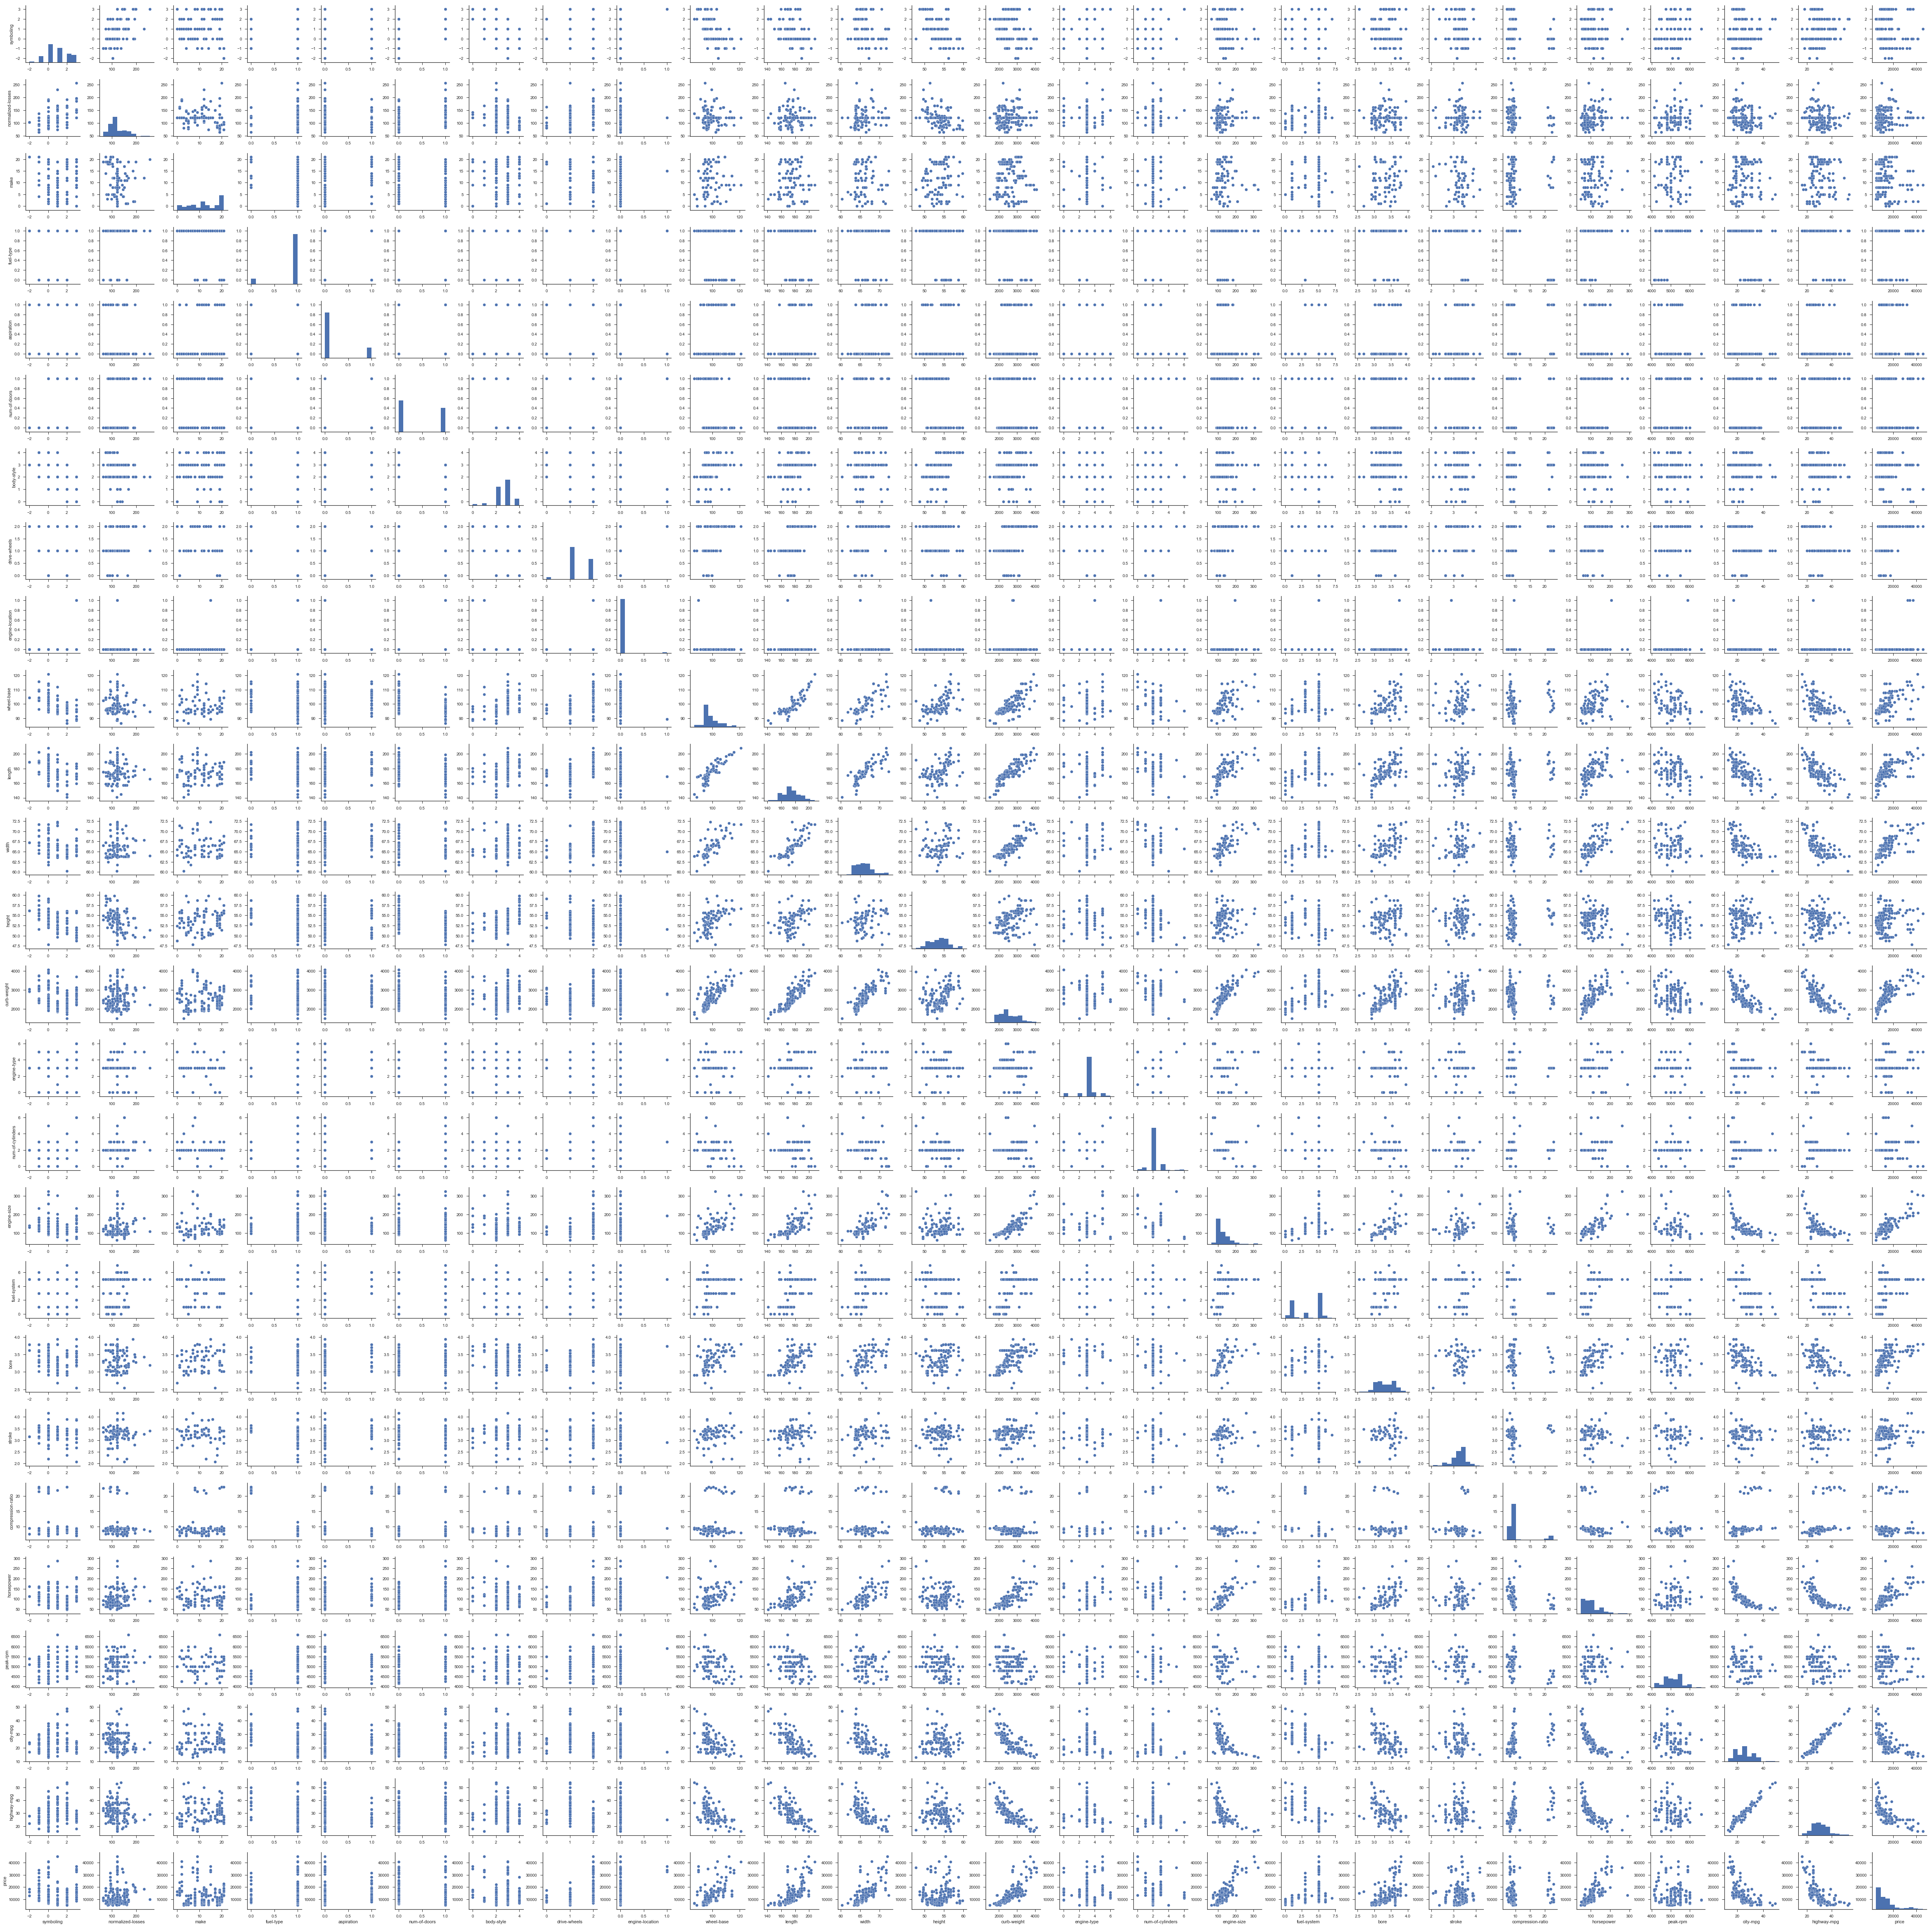

In [39]:
sns.set(style= 'ticks')
plt = sns.pairplot(df_1)

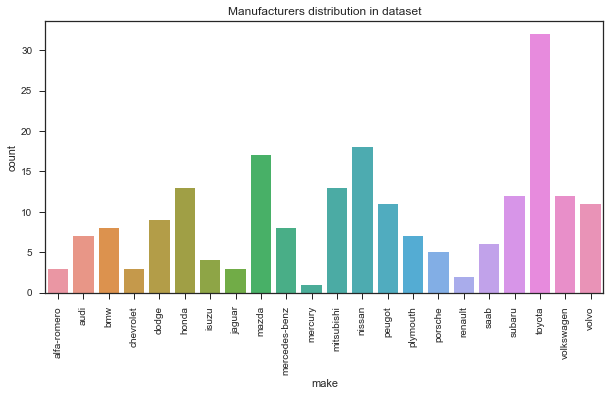

In [40]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
sns.countplot(x='make', data=df)
plt.xticks(rotation='vertical')
plt.title('Manufacturers distribution in dataset')
plt.show()

# *Top Selling Car Manufacturer is Toyota

Categorical features distributions:

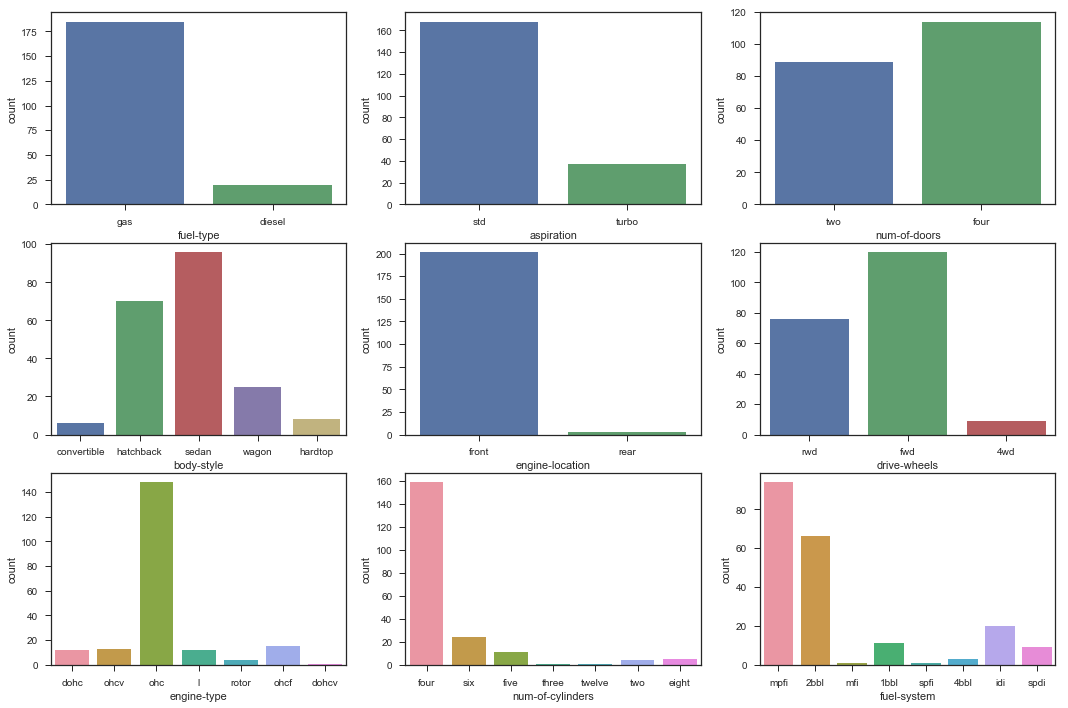

In [41]:
categorical = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'engine-location',
               'drive-wheels', 'engine-type', 'num-of-cylinders', 'fuel-system']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax)

# Max Cars are running on Gas

# Max Cars have engine in front

# Max Cars have 4 cylinders

# Max Cars have mpfi as fuel system

In [42]:
df_1.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,4.651899e-01,-0.118794,0.194311,-0.059866,0.663595,-0.596135,-0.041671,2.124709e-01,-0.531954,...,-0.105790,0.091163,-0.130083,-0.008689,-0.178515,0.071389,0.273679,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000e+00,-0.250975,0.101437,-0.006823,0.357192,-0.250893,0.311032,4.281126e-19,-0.056518,...,0.110997,0.228035,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
make,-0.118794,-2.509755e-01,1.000000,-0.113191,0.054265,-0.151516,0.089494,-0.004317,5.460831e-02,0.078505,...,-0.070918,0.146624,0.251152,-0.201043,0.138828,-0.053654,-0.218342,0.053642,0.050022,-0.161471
fuel-type,0.194311,1.014370e-01,-0.113191,1.000000,-0.401397,0.188496,-0.147853,-0.132257,4.006951e-02,-0.308346,...,-0.069594,0.041529,-0.054457,-0.241820,-0.984356,0.165190,0.477060,-0.255963,-0.191392,-0.110207
aspiration,-0.059866,-6.822700e-03,0.054265,-0.401397,1.000000,-0.052803,0.063028,0.066465,-5.719146e-02,0.257611,...,0.108217,0.288086,0.212623,0.222970,0.295541,0.240182,-0.183629,-0.202362,-0.254416,0.177285
num-of-doors,0.663595,3.571925e-01,-0.151516,0.188496,-0.052803,1.000000,-0.685640,0.104877,1.391294e-01,-0.439635,...,-0.013919,0.006980,-0.108510,0.006892,-0.171797,0.128184,0.240298,0.014271,0.037452,-0.041945
body-style,-0.596135,-2.508926e-01,0.089494,-0.147853,0.063028,-0.685640,1.000000,-0.155745,-2.770093e-01,0.401362,...,-0.073352,-0.065079,0.010562,-0.015344,0.136243,-0.152438,-0.109410,0.031697,-0.007170,-0.072677
drive-wheels,-0.041671,3.110317e-01,-0.004317,-0.132257,0.066465,0.104877,-0.155745,1.000000,1.478645e-01,0.459745,...,0.524307,0.424686,0.481805,0.071623,0.127479,0.516936,-0.039724,-0.449581,-0.452220,0.576866
engine-location,0.212471,4.281126e-19,0.054608,0.040070,-0.057191,0.139129,-0.277009,0.147865,1.000000e+00,-0.187790,...,0.196826,0.105971,0.185044,-0.138459,-0.019762,0.317610,0.198400,-0.153487,-0.102026,0.331013
wheel-base,-0.531954,-5.651842e-02,0.078505,-0.308346,0.257611,-0.439635,0.401362,0.459745,-1.877902e-01,1.000000,...,0.569329,0.384601,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168


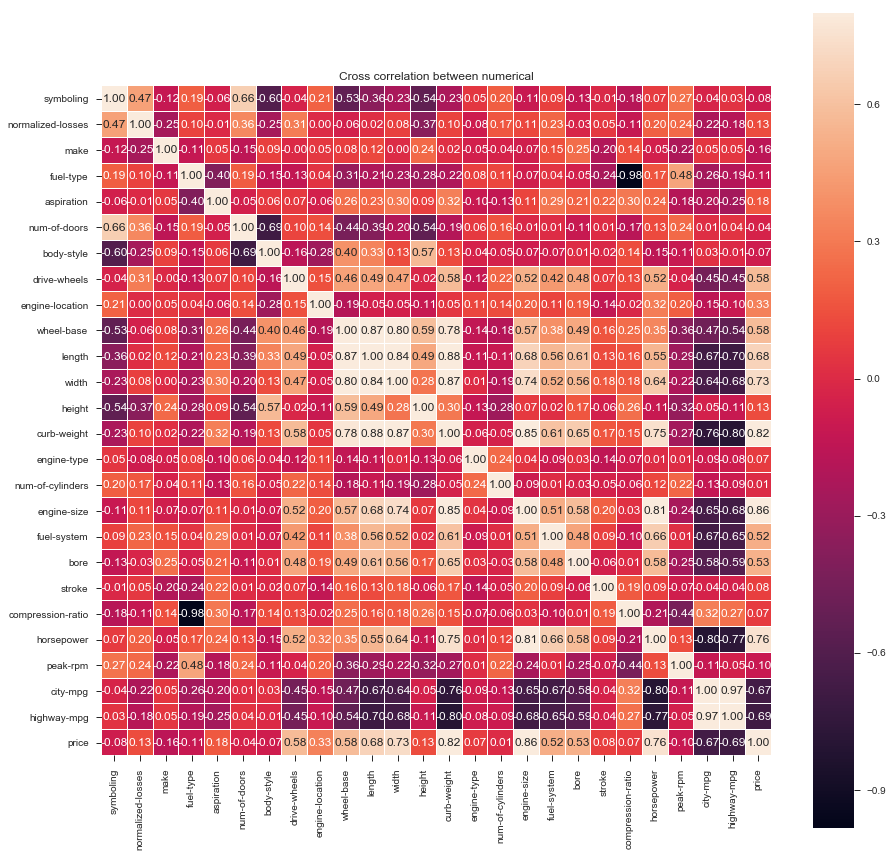

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_1.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

In [44]:
## Above graph shows Wheel base , Length , Width are highly correlated. 
## Highway mpg and city mpg is also highly correlated. 
## Compression ratio and fuel type is also correlated 
## Engine size and horse power is also correlated
df_2 = df_1.drop(['length','width','city-mpg','fuel-type','horsepower'],axis=1)
df_2.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,height,...,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg,price
0,3,122.0,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,13495.0
1,3,122.0,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,16500.0
2,1,122.0,0,0,1,2,2,0,94.5,52.4,...,5,3,152,5,2.68,3.47,9.0,5000.0,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,54.3,...,3,2,109,5,3.19,3.40,10.0,5500.0,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,54.3,...,3,1,136,5,3.19,3.40,8.0,5500.0,22,17450.0


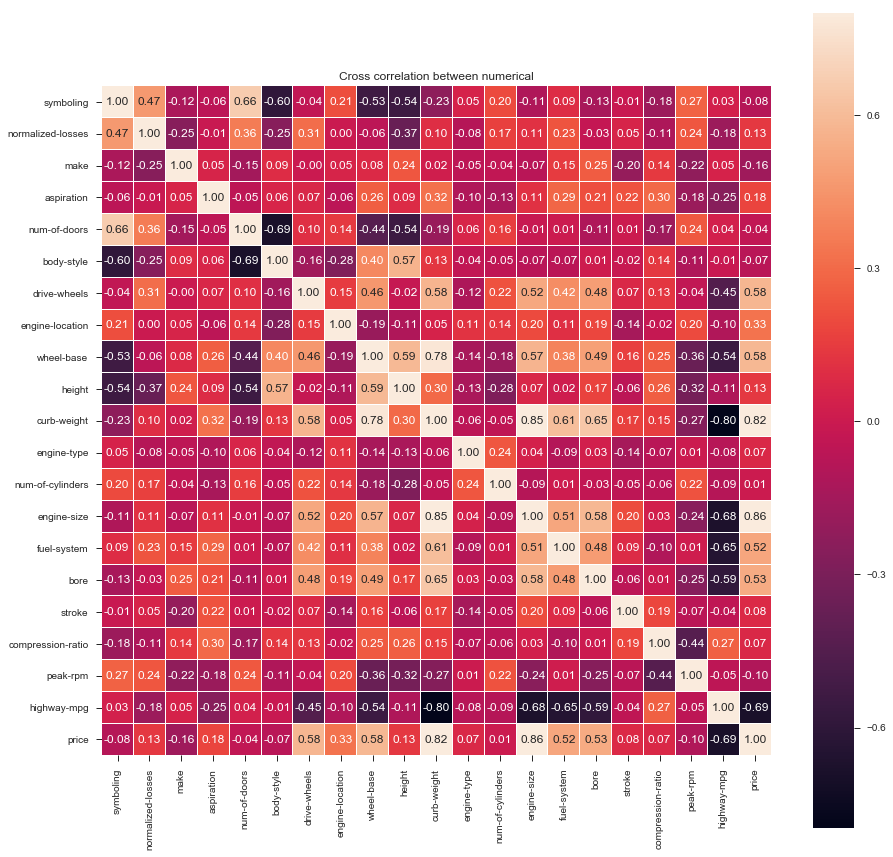

In [45]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df_2.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()

above graphs and HeatMap shows that -
Wheel base , Length , Width are highly correlated.
Highway mpg and city mpg is also highly correlated.
Compression ratio and fuel type is also correlated
Engine size and horse power is also correlated

Attributes which has stronger relationship with price -
1. Curb-Weight
2. Engine-Size
3. Horsepower
4. Mpg(City / Highway mpg)¶
5. Lenght/ Width

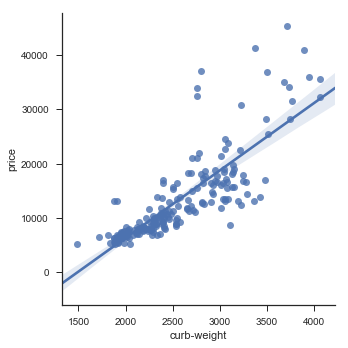

In [46]:
sns.lmplot(x= 'curb-weight' , y='price', data=df_2)

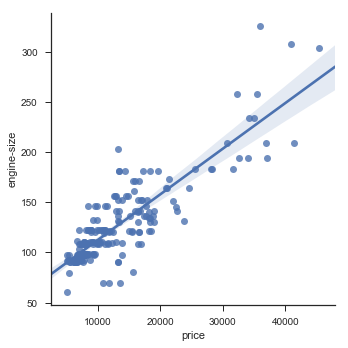

In [94]:
g = sns.lmplot('price',"engine-size", df_2);

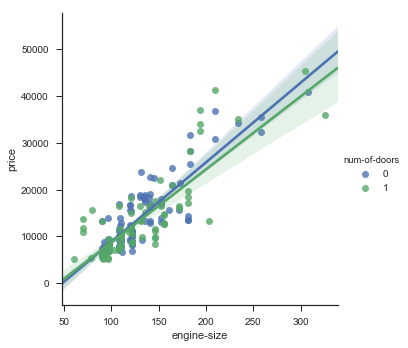

In [47]:
sns.lmplot(x= 'engine-size' , y='price', hue = 'num-of-doors', data=df_2)

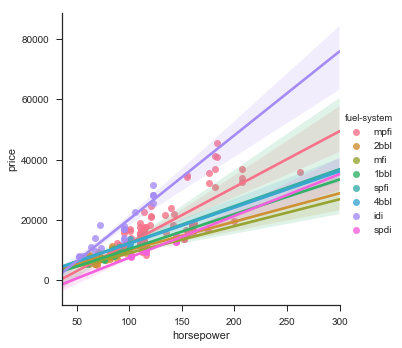

In [173]:
sns.lmplot(x= 'horsepower' , y='price',hue = 'fuel-system', data=df)

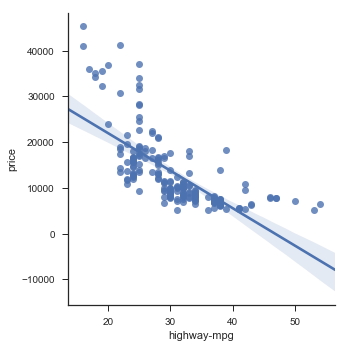

In [174]:
sns.lmplot(x= 'highway-mpg' , y='price', data=df)

# Split data into training and test data

In [118]:
X = df_2.drop('price',axis =1)
X.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,highway-mpg
0,3,122.0,0,0,1,0,2,0,88.6,48.8,2548,0,2,130,5,3.47,2.68,9.0,5000.0,27
1,3,122.0,0,0,1,0,2,0,88.6,48.8,2548,0,2,130,5,3.47,2.68,9.0,5000.0,27
2,1,122.0,0,0,1,2,2,0,94.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,5000.0,26
3,2,164.0,1,0,0,3,1,0,99.8,54.3,2337,3,2,109,5,3.19,3.40,10.0,5500.0,30
4,2,164.0,1,0,0,3,0,0,99.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,5500.0,22


In [119]:
# Lets use 80% of data for training and 20% for testing

import sklearn
Y = df_2['price']
X = df_2.drop('price',axis =1)

In [120]:
x_train, x_test, y_train,  y_test = sklearn.model_selection.train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=0)

# Linear Regression could be the best algorithm to solve such problem with better accuracy as most of the attributes (Independent Variables) follow Linear pattern with Dependent variable i.e. (Price)

# Training of the model

In [148]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm_1 = regressor.fit(x_train, y_train)

In [149]:
lm_1.score(x_train,y_train)

0.90784703354982244

In [150]:
lm_1.score(x_test,y_test)

0.72232251844508821

In [151]:
df_2.shape

(205, 21)

In [152]:
df_3 = df_2.copy()

In [153]:
# Replace '-' in column names with '_'
names = []
for name in df_3.columns:
    names.append(name.replace('-', '_'))


In [154]:
df_3.columns = names

In [155]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
symboling            205 non-null int64
normalized_losses    205 non-null float64
make                 205 non-null int64
aspiration           205 non-null int64
num_of_doors         205 non-null int64
body_style           205 non-null int64
drive_wheels         205 non-null int64
engine_location      205 non-null int64
wheel_base           205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null int64
num_of_cylinders     205 non-null int64
engine_size          205 non-null int64
fuel_system          205 non-null int64
bore                 205 non-null float64
stroke               205 non-null float64
compression_ratio    205 non-null float64
peak_rpm             205 non-null float64
highway_mpg          205 non-null int64
price                205 non-null float64
dtypes: float64(8), int64(13)
memory us

In [156]:
import statsmodels.formula.api as smf

lm0 = smf.ols(formula= 'price ~ symboling+normalized_losses+make+aspiration+num_of_doors+body_style+drive_wheels+engine_location+wheel_base+height+curb_weight+engine_type+num_of_cylinders+engine_size+fuel_system+bore+stroke+compression_ratio+peak_rpm' , data =df_3).fit()

In [157]:
lm0.params

Intercept           -37670.984663
symboling              403.573642
normalized_losses       -7.327280
make                  -205.130679
aspiration            1457.040719
num_of_doors         -1065.102397
body_style            -947.636392
drive_wheels          1199.541192
engine_location      11953.604315
wheel_base             257.047038
height                 239.521428
curb_weight              2.442158
engine_type            438.706257
num_of_cylinders       339.160696
engine_size            108.746056
fuel_system            138.648483
bore                 -1823.326551
stroke               -2906.252613
compression_ratio       85.511402
peak_rpm                 1.702481
dtype: float64

In [158]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     68.41
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           4.68e-73
Time:                        15:41:25   Log-Likelihood:                -1915.9
No. Observations:                 205   AIC:                             3872.
Df Residuals:                     185   BIC:                             3938.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3.767e+04   9881.72

# Model Builduing Part -2

In [159]:
from sklearn.preprocessing import Normalizer
# Normalizing Data
nor = Normalizer()
df_4 = nor.fit_transform(df_2)

In [160]:
col = []
for i in df_2.columns:
    col.append(i.replace('-', '_'))  

In [161]:
df_4 = pd.DataFrame(df_4 , columns  = col)
df_4.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,height,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,peak_rpm,highway_mpg,price
0,0.000205,0.008347,0.000000,0.0,0.000068,0.000000,0.000137,0.0,0.006062,0.003339,...,0.000000,0.000137,0.008894,0.000342,0.000237,0.000183,0.000616,0.342073,0.001847,0.923254
1,0.000172,0.007000,0.000000,0.0,0.000057,0.000000,0.000115,0.0,0.005083,0.002800,...,0.000000,0.000115,0.007459,0.000287,0.000199,0.000154,0.000516,0.286871,0.001549,0.946674
2,0.000057,0.006983,0.000000,0.0,0.000057,0.000114,0.000114,0.0,0.005409,0.002999,...,0.000286,0.000172,0.008700,0.000286,0.000153,0.000199,0.000515,0.286173,0.001488,0.944370
3,0.000132,0.010805,0.000066,0.0,0.000000,0.000198,0.000066,0.0,0.006575,0.003578,...,0.000198,0.000132,0.007182,0.000329,0.000210,0.000224,0.000659,0.362370,0.001977,0.919103
4,0.000108,0.008858,0.000054,0.0,0.000000,0.000162,0.000000,0.0,0.005369,0.002933,...,0.000162,0.000054,0.007346,0.000270,0.000172,0.000184,0.000432,0.297065,0.001188,0.942505


In [162]:
# Lets use 80% of data for training and 20% for testing

import sklearn
Y_1 = df_4['price']
X_1 = df_4.drop('price',axis =1)

In [163]:
x_train_1, x_test_1, y_train_1,  y_test_1 = sklearn.model_selection.train_test_split(X_1, Y_1,train_size=0.8, test_size=0.2, random_state=0)

In [164]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm_2 = regressor.fit(x_train_1, y_train_1)



In [165]:
pred_train_y = regressor.predict(x_train_1)
pred_test_y = regressor.predict(x_test_1)

In [166]:
lm_2.score(x_train_1,y_train_1)

0.97885831416195423

# R^2 = 0.98 for Train data

In [167]:
lm_2.score(x_test_1,y_test_1)

0.9595538014039835

# R^2 = 0.96 for Test data



# Mean Square Error

In [170]:
mse = np.mean((pred_test_y -y_test_1)**2)
print(mse)

0.000305578402231


Text(0.5,1,'Residual plot')

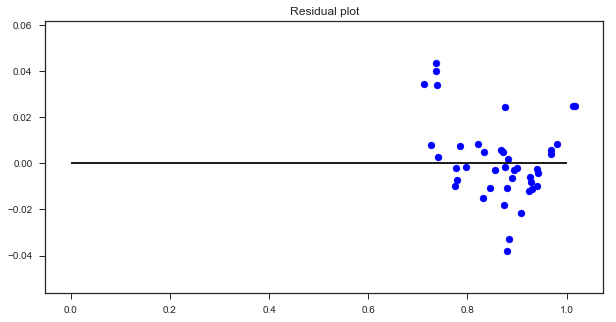

In [176]:
## Residual Vs fitted plot - 
x_plot = plt.scatter(pred_test_y,(pred_test_y - y_test_1),c='b')
plt.hlines(y=0,xmin = 0 , xmax = 1)
plt.title('Residual plot')